In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func ,inspect

In [4]:
# create engine to hawaii.sqlite
from sqlalchemy.ext.declarative import declarative_base
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = declarative_base()
Base.metadata.create_all(engine)

In [5]:
# reflect an existing database into a new model
inspector = inspect(engine)

# reflect the tables
inspector.get_table_names()


['measurement', 'station']

In [6]:
# View all of the classes that automap found

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])
    
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [7]:
# reflect an existing database into a new modelB
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect= True)


In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
Earliest_date= session.query(Measurement.date).order_by(Measurement.date).first().date
Earliest_date


'2010-01-01'

In [12]:
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

'2017-08-23'

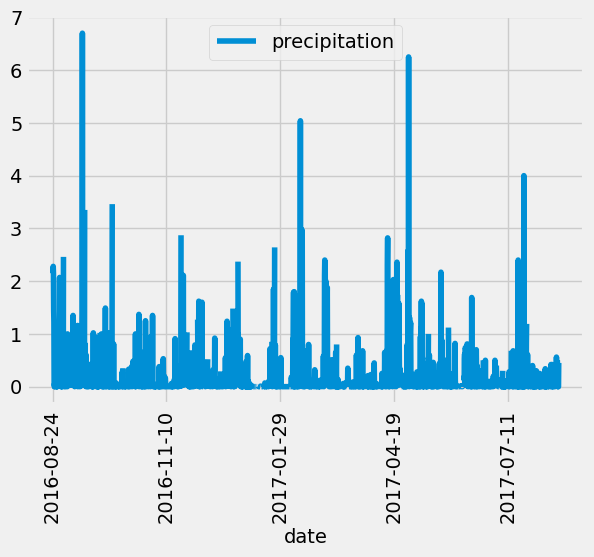

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
latest_date

# Calculate the date one year from the last date in data set.
last_12_months = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_12_months

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp)

# Save the query results as a Pandas DataFrame and set the index to the date column
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_12_months)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_12_months).all()

# Sort the dataframe by date

df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data

df.plot()
#df.plot(kind='bar',alpha=0.75, rot=90)
plt.xticks(rotation=90)

#plt.tight_layout()
#df.plot()
plt.show()



In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [52]:
# Design a query to calculate the total number stations in the dataset
session.query()
session.query(func.count(Station.station)).all()

[(9,)]

In [58]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [81]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

#session.query()
#session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))

tobs= session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

print(tobs)


[(54.0, 85.0, 71.66378066378067)]


     tobs
0    77.0
1    80.0
2    80.0
3    75.0
4    73.0
..    ...
346  77.0
347  77.0
348  76.0
349  76.0
350  79.0

[351 rows x 1 columns]


Text(0.5, 4.183333333333314, 'Temperature (°F)')

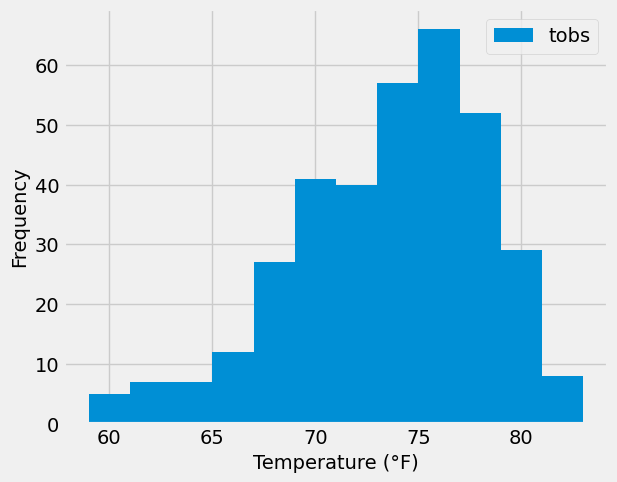

In [93]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram




results2 = session.query(Measurement.tobs).filter(Measurement.date >= last_12_months).\
filter(Measurement.station == 'USC00519281').all()

# Sort the dataframe by date

tobs_values_df = pd.DataFrame(results2, columns=['tobs'])
print(tobs_values_df)

#df = pd.DataFrame(results2, columns=['tobs'])
#df.set_index(df['tobs'], inplace=True)
#df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot.hist(bins=12)
plt.tight_layout()
#df.plot()
plt.xticks(rotation=0)
plt.xlabel('Temperature (°F)')



# Close session

In [19]:
# Close Session
session.close()